In [3]:
import FinanceDataReader as fdr

fdr.__version__

'0.9.31'

In [2]:
import FinanceDataReader as fdr
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

system_name = platform.system()

if system_name == 'Windows':
# Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
# Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

df_krx = fdr.StockListing('KRX')
df_krx.shape   #한국 거래소 상장종목 전체가 7207개가 있고, 각 컬럼들은 10개를 가지는것을 알 수 있다.
df_krx.columns #KRX (한국 거새로 상장종목)의 보유 컬럼들을 체크하기 위함이다. 이를 통하여 Symbol, Market, Name, Sector, Industry, ListingDate,
#SettleMonth, Representative, HomePage, Region을 가지는것을 알 수 있다.
df_krx.head()


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [4]:
nsi_df = pd.read_csv('C:\jupiterworkspace\pandas\data/NSI.csv', encoding='cp949')

#날짜 열 만들기
cols = ['year', 'month', 'date']
nsi_df['combine'] = pd.to_datetime(nsi_df[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1))

nsi_df.head()


,year,month,date,NSI,combine
0,2005,1,1,111.91,2005-01-01
1,2005,1,2,112.46,2005-01-02
2,2005,1,3,113.67,2005-01-03
3,2005,1,4,117.64,2005-01-04
4,2005,1,5,119.31,2005-01-05


In [5]:
#시작일 입력 & 인덱스 반환
start_date = input('시작일(yyyy-mm-dd): ')

start_yy = int(start_date[:4])
start_mm = int(start_date[5:7])
start_dd = int(start_date[8:])

df1 = nsi_df[nsi_df['year']==start_yy] 
df2 = df1[df1['month']==start_mm]
df3 = df2[df2['date']==start_dd]

start_index = df3.index.values[0]

#종료일 입력 & 인덱스 반환
end_date = input('종료일(yyyy-mm-dd): ')

end_yy = int(end_date[:4])
end_mm = int(end_date[5:7])
end_dd = int(end_date[8:])

df4 = nsi_df[nsi_df['year']==end_yy] 
df5 = df4[df4['month']==end_mm]
df6 = df5[df5['date']==end_dd]

end_index = df6.index.values[0]

#start~end nsi df 잘라내기
target_nsi = nsi_df.iloc[start_index : end_index+1]
target_nsi.head()


,year,month,date,NSI,combine
5478,2020,1,1,112.02,2020-01-01
5479,2020,1,2,111.44,2020-01-02
5480,2020,1,3,115.05,2020-01-03
5481,2020,1,4,117.75,2020-01-04
5482,2020,1,5,118.93,2020-01-05


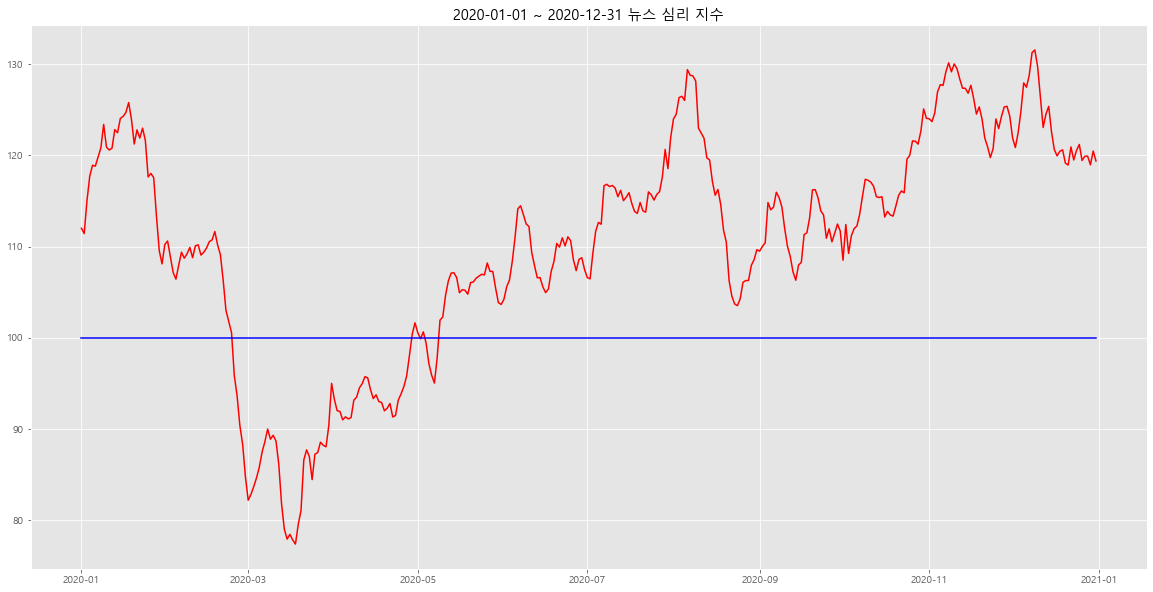

In [6]:

#100선
a = pd.date_range(start_date, end_date)
b = [100] *len(a)

#start~end nsi 그래프 표현
def nsi_graph() :
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    plt.figure(figsize=(20,10))
    plt.title(start_date + ' ~ ' + end_date + ' 뉴스 심리 지수')
    plt.plot(a, target_nsi['NSI'], color='red')
    plt.plot(a, b, color='blue')
    plt.show()

nsi_graph()

['005930']
2021-01-01
             Open   High    Low  Close    Volume      Change  Cum_Change
Date                                                                    
2020-01-02    100    100    100    100       100  100.000000  100.000000
2020-01-03  56000  56600  54900  55500  15422255    0.543478  100.543478
2020-01-06  54900  55600  54600  55500  10278951    0.000000  100.543478
2020-01-07  55700  56400  55600  55800  10009778    0.540541  101.084019
2020-01-08  56200  57400  55900  56800  23501171    1.792115  102.876133


C:\Users\q\AppData\Local\Temp/ipykernel_12452/3915789274.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_stock['Change'] = target_stock['Change'] * 100
C:\Users\q\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\q\AppData\Local\Temp/ipykernel_12452/3915789274.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

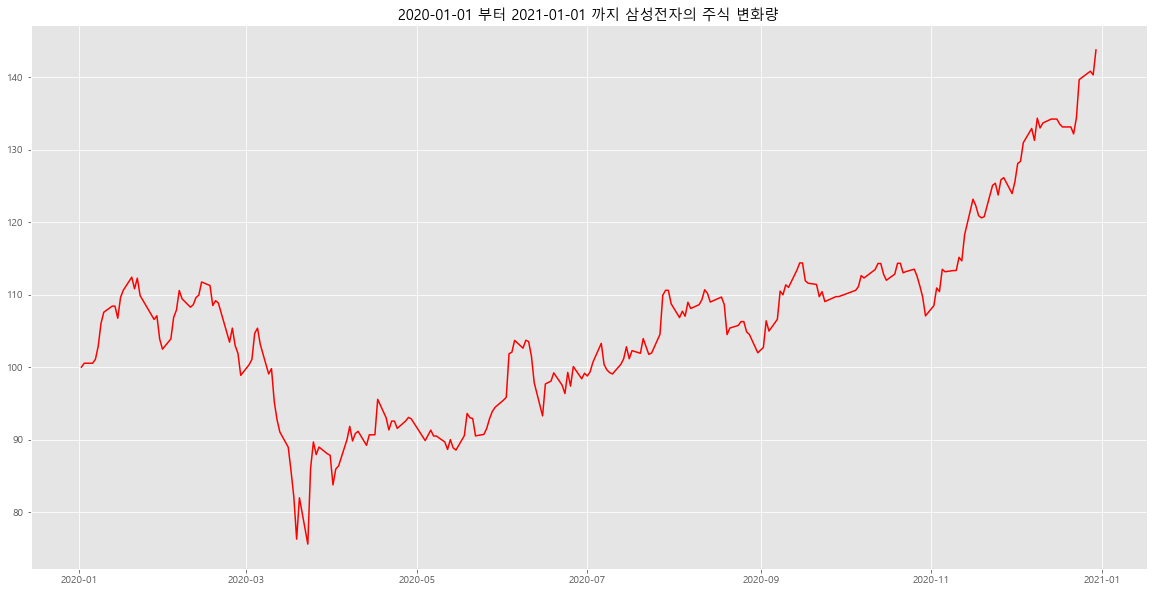

In [7]:
#관심주의 연간 그래프
Symbol_name=input("찾으실 주식의 이름을 넣어주세요")
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
print(Symbol_code)

df= fdr.DataReader(Symbol_code[0])

end_date = datetime.date(end_yy, end_mm, end_dd)
end_date = end_date + datetime.timedelta(days = 1)
print(end_date)

#관심주의 주식 데이터 프레임 생성
target_stock = df.loc[start_date : end_date]
target_stock['Change'] = target_stock['Change'] * 100
target_stock.iloc[0] = 100
target_stock['Cum_Change'] = target_stock['Change'].cumsum()
print(target_stock.head())

#start~end stock 그래프 표현
def stock_graph() :
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    plt.figure(figsize=(20,10))
    plt.title('{0} 부터 {1} 까지 {2}의 주식 변화량'.format(start_date, end_date, Symbol_name))
    plt.plot(target_stock['Cum_Change'], color='red')
    plt.show()

stock_graph()


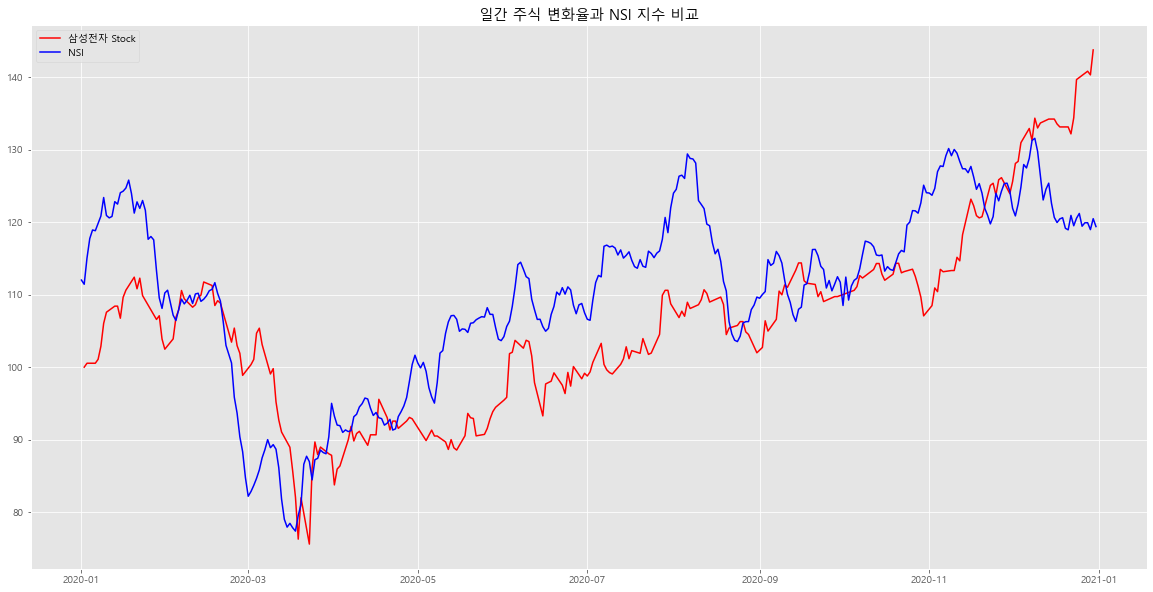

In [8]:
def total_graph() :
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    plt.figure(figsize=(20,10))
    plt.title('일간 주식 변화율과 NSI 지수 비교')
    
    plt.plot(target_stock['Cum_Change'], color='red', label=Symbol_name +' Stock')
    plt.plot(a, target_nsi['NSI'], color='blue', label='NSI')
    plt.legend()
    plt.show()

total_graph()

In [9]:
##nsi랑 주식 하나랑 비교하는 그래프 찾았으니까 몇 개 유명한거 더해보고 대충 비슷한 양상을 띈다~~
##시간 남으면 여러개 그릴 수 있는 그래프 그려보쟈

['066570']
             Open   High    Low  Close  Volume      Change  Cum_Change
Date                                                                  
2020-01-02    100    100    100    100     100  100.000000  100.000000
2020-01-03  71400  71900  70800  71100  369493    0.140845  100.140845
2020-01-06  70300  70500  69600  69900  337026   -1.687764   98.453081
2020-01-07  69800  70600  69800  70300  265311    0.572246   99.025327
2020-01-08  70300  70300  67000  67500  937438   -3.982930   95.042397


C:\Users\q\AppData\Local\Temp/ipykernel_12452/2364398951.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_stock['Change'] = target_stock['Change'] * 100
C:\Users\q\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\q\AppData\Local\Temp/ipykernel_12452/2364398951.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

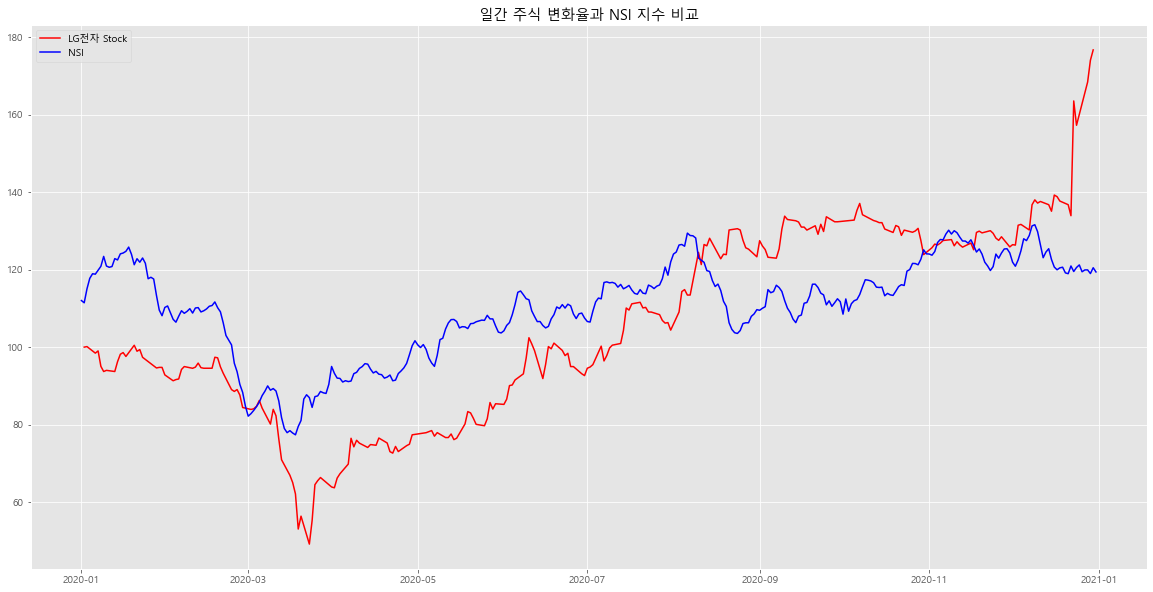

In [10]:
#위에 한 거 SK하이닉스 한번더
#관심주의 연간 그래프
Symbol_name= 'LG전자'
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
print(Symbol_code)

df= fdr.DataReader(Symbol_code[0])

#관심주의 주식 데이터 프레임 생성
target_stock = df.loc[start_date : end_date]
target_stock['Change'] = target_stock['Change'] * 100
target_stock.iloc[0] = 100
target_stock['Cum_Change'] = target_stock['Change'].cumsum()
print(target_stock.head())

total_graph()

In [ ]:
def many_graph() :
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    plt.figure(figsize=(20,10))
    plt.title('일간 주식 변화율과 NSI 지수 비교')
    
    plt.plot(target_stock1['Cum_Change'], color='blue', label='삼성전자 Stock')
    plt.plot(target_stock2['Cum_Change'], color='yellow', label='셀트리온 Stock')
    plt.plot(target_stock3['Cum_Change'], color='green', label='SM Stock')
    plt.plot(a, target_nsi['NSI'], color='red', label='NSI')
    plt.legend()
    plt.show()

In [ ]:
#위에 한 거 삼성전자 한번더
#관심주의 연간 그래프
Symbol_name= '삼성전자'
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
df= fdr.DataReader(Symbol_code[0])

#관심주의 주식 데이터 프레임 생성
target_stock1 = df.loc[start_date : end_date]
target_stock1['Change'] = target_stock1['Change'] * 100
target_stock1.iloc[0] = 100
target_stock1['Cum_Change'] = target_stock1['Change'].cumsum()

#위에 한 거 셀트리온 한번더
#관심주의 연간 그래프
Symbol_name= '셀트리온'
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
df= fdr.DataReader(Symbol_code[0])

#관심주의 주식 데이터 프레임 생성
target_stock2 = df.loc[start_date : end_date]
target_stock2['Change'] = target_stock2['Change'] * 100
target_stock2.iloc[0] = 100
target_stock2['Cum_Change'] = target_stock2['Change'].cumsum()

#위에 한 거 에스엠 한번더
#관심주의 연간 그래프
Symbol_name= '에스엠'
Symbol_code= 0
Symbol_code= (df_krx[df_krx['Name']== Symbol_name]['Symbol'].values)
df= fdr.DataReader(Symbol_code[0])

#관심주의 주식 데이터 프레임 생성
target_stock3 = df.loc[start_date : end_date]
target_stock3['Change'] = target_stock3['Change'] * 100
target_stock3.iloc[0] = 100
target_stock3['Cum_Change'] = target_stock3['Change'].cumsum()

many_graph()

In [11]:
#산점도 그려보자

#주식장이 열리지 않는 날에 대한 nsi 지수 삭제


print(len(target_stock['Cum_Change']))
print(len(target_nsi['NSI']))

def scatter_graph() :
    plt.style.use('ggplot')
    plt.rc('font', family='Malgun Gothic')
    
    plt.figure(figsize=(10,10))
    plt.title('일간 주식 변화율과 NSI 지수 비교')
    
    plt.scatter(target_nsi['NSI'], target_stock['Cum_Change'], cmap='jet', alpha=0.7)
    plt.colorbar()
    plt.show()

#scatter_graph()

248
366


In [14]:
#주식장이 열리지 않는 날에 대한 nsi 지수 삭제
print(target_nsi.head())
print(target_stock.head())

aaa=target_stock.index.tolist()
print(aaa)
"""
condition = target_nsi['combine'] in aaa
my_nsi = nsi_df[condition]
print(my_nsi.head())
"""

for i in range(target_nsi.shape[0]) :
    print('a', end='')
    if target_nsi.loc[i+start_index, 'combine'] not in aaa :
        print('aa')
        target_nsi.drop[i + start_index]

target_nsi.head()


      year  month  date     NSI    combine
5478  2020      1     1  112.02 2020-01-01
5479  2020      1     2  111.44 2020-01-02
5480  2020      1     3  115.05 2020-01-03
5481  2020      1     4  117.75 2020-01-04
5482  2020      1     5  118.93 2020-01-05
             Open   High    Low  Close  Volume      Change  Cum_Change
Date                                                                  
2020-01-02    100    100    100    100     100  100.000000  100.000000
2020-01-03  71400  71900  70800  71100  369493    0.140845  100.140845
2020-01-06  70300  70500  69600  69900  337026   -1.687764   98.453081
2020-01-07  69800  70600  69800  70300  265311    0.572246   99.025327
2020-01-08  70300  70300  67000  67500  937438   -3.982930   95.042397
[Timestamp('2020-01-02 00:00:00'), Timestamp('2020-01-03 00:00:00'), Timestamp('2020-01-06 00:00:00'), Timestamp('2020-01-07 00:00:00'), Timestamp('2020-01-08 00:00:00'), Timestamp('2020-01-09 00:00:00'), Timestamp('2020-01-10 00:00:00'), Timest

TypeError: 'method' object is not subscriptable

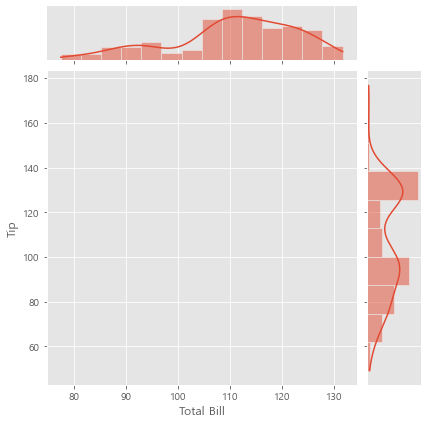

In [ ]:
import seaborn as sns

joint = sns.jointplot(x=target_nsi['NSI'], y=target_stock['Cum_Change'], kind='reg')
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

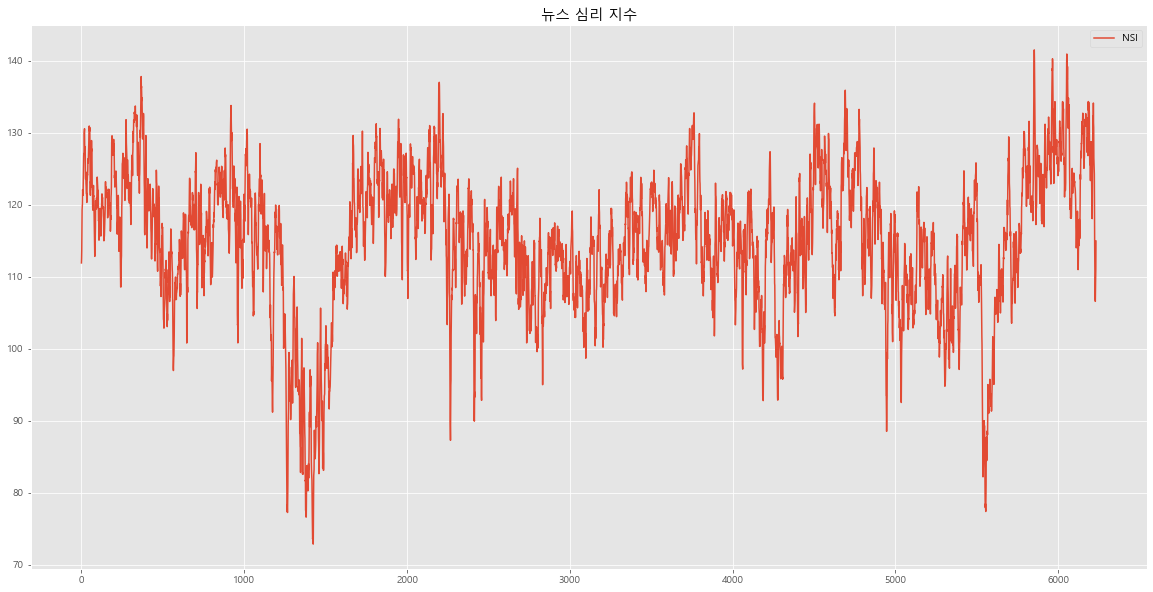

In [ ]:
plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(20,10))
plt.title('뉴스 심리 지수')
plt.plot(nsi_df['NSI'], label='NSI')
plt.legend()
plt.show()

In [ ]:
#nsi는 감정지수기 때문에 70~140정도로만 분포 >> 주식데이터도 0 근처에서 왔다갔다 하도록 구성
#x label 어떻게 설정하는지~~~

#그래프에 같이 나타내기 스케일 맞춰서! ok
#산점도로 나타낼 수도 있겠당(음수 표현이 가능할까??) + 추세선~~
#색칠나오는 네모 사각형으로 여러개 비교해보기